In [1]:
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import pandas as pd

# (g)

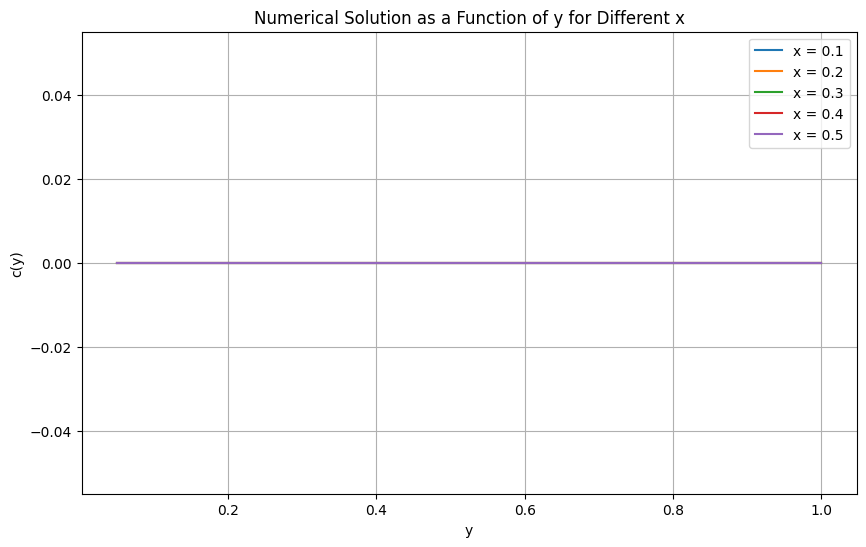

,n,beta
0,5,0.0
1,10,0.0
2,15,0.0
3,20,0.0
4,25,0.0


In [2]:
delta_y = 0.05
delta_x = 0.02
v = 1
phi = 4
epsilon = 1 / phi  # Since phi^2 = (epsilon^2 k) / D, assume D = k = 1 for simplicity
num_steps = 25
num_y_points = int(1 / delta_y) + 1

y_values = np.linspace(0, 1, num_y_points)

A = np.zeros((num_y_points - 1, num_y_points - 1))
for i in range(1, num_y_points - 2):
    A[i, i - 1] = 1
    A[i, i] = -2 - (phi ** 2) * (delta_y ** 2) / v
    A[i, i + 1] = 1

# Boundary conditions for A
A[0, 0] = -1 - (phi ** 2) * (delta_y ** 2) / v
A[0, 1] = 1
A[-1, -2] = 1
A[-1, -1] = -1 - (phi ** 2) * (delta_y ** 2) / v

r = np.zeros(num_y_points - 1)

# Initial condition
u = np.zeros(num_y_points - 1)

def theta_method_step(u, A, r, theta, delta_x):
    I = np.eye(A.shape[0])
    A_hat = I - theta * delta_x * A
    B_hat = I + (1 - theta) * delta_x * A
    rhs = B_hat @ u + delta_x * r
    u_new = np.linalg.solve(A_hat, rhs)
    return u_new

solutions = []

# Perform the time/x steps
for n in range(1, num_steps + 1):
    u = theta_method_step(u, A, r, theta=3/4, delta_x=delta_x)
    if n in [5, 10, 15, 20, 25]:
        solutions.append(u.copy())

# Function to compute beta using the derived second-order one-sided difference formula
def compute_beta(u):
    return (-u[-3] + 4 * u[-2] - 3 * u[-1]) / (2 * delta_y)

# Compute beta for each n
beta_values = [compute_beta(sol) for sol in solutions]

# Plot the numerical solution as a function of y for different x = n * delta_x
plt.figure(figsize=(10, 6))
for i, n in enumerate([5, 10, 15, 20, 25]):
    plt.plot(y_values[1:], solutions[i], label=f'x = {n * delta_x}')

plt.xlabel('y')
plt.ylabel('c(y)')
plt.title('Numerical Solution as a Function of y for Different x')
plt.legend()
plt.grid(True)
plt.show()

beta_table = pd.DataFrame({'n': [5, 10, 15, 20, 25], 'beta': beta_values})
beta_table


# (h)

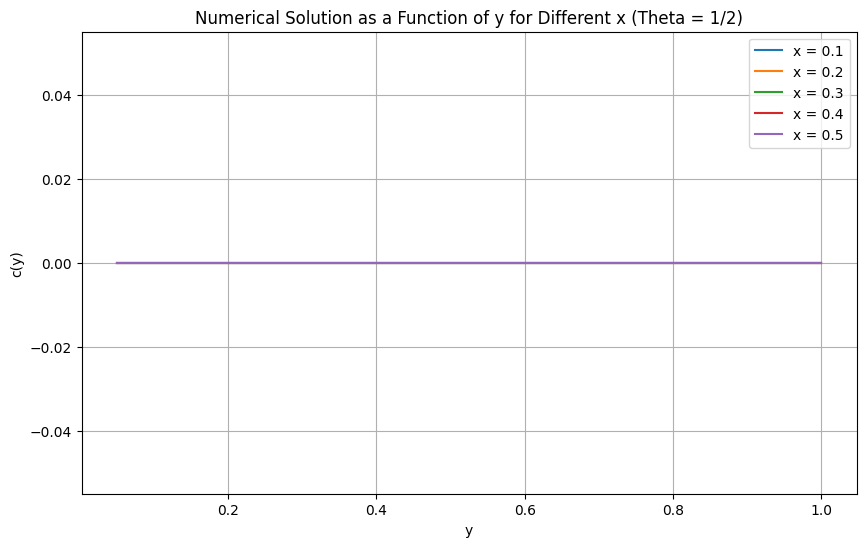

,n,beta
0,5,0.0
1,10,0.0
2,15,0.0
3,20,0.0
4,25,0.0


In [3]:
# Function to perform one step of the theta-method with theta = 1/2 (Crank-Nicolson method)
def theta_method_step_half(u, A, r, theta, delta_x):
    I = np.eye(A.shape[0])
    A_hat = I - theta * delta_x * A
    B_hat = I + (1 - theta) * delta_x * A
    rhs = B_hat @ u + delta_x * r
    u_new = np.linalg.solve(A_hat, rhs)
    return u_new

# Store solutions for different steps with theta = 1/2
solutions_half = []

# Initial condition
u_half = np.zeros(num_y_points - 1)

# Perform the time steps with theta = 1/2
for n in range(1, num_steps + 1):
    u_half = theta_method_step_half(u_half, A, r, theta=1/2, delta_x=delta_x)
    if n in [5, 10, 15, 20, 25]:
        solutions_half.append(u_half.copy())

# Compute beta for each n with theta = 1/2
beta_values_half = [compute_beta(sol) for sol in solutions_half]

# Plot the numerical solution as a function of y for different x = n * delta_x with theta = 1/2
plt.figure(figsize=(10, 6))
for i, n in enumerate([5, 10, 15, 20, 25]):
    plt.plot(y_values[1:], solutions_half[i], label=f'x = {n * delta_x}')

plt.xlabel('y')
plt.ylabel('c(y)')
plt.title('Numerical Solution as a Function of y for Different x (Theta = 1/2)')
plt.legend()
plt.grid(True)
plt.show()

beta_table_half = pd.DataFrame({'n': [5, 10, 15, 20, 25], 'beta': beta_values_half})
beta_table_half


# $$ x \rightarrow \infty $$

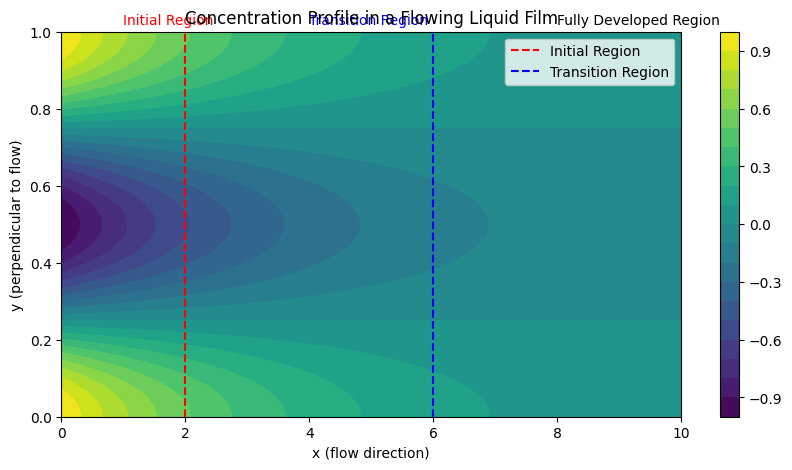

In [4]:
x = np.linspace(0, 10, 400)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)

C = np.exp(-X / 3) * np.cos(2 * np.pi * Y)

plt.figure(figsize=(10, 5))
contour = plt.contourf(X, Y, C, levels=20, cmap='viridis')
plt.colorbar(contour)
plt.xlabel('x (flow direction)')
plt.ylabel('y (perpendicular to flow)')
plt.title('Concentration Profile in a Flowing Liquid Film')

plt.axvline(x=2, color='red', linestyle='--', label='Initial Region')
plt.axvline(x=6, color='blue', linestyle='--', label='Transition Region')
plt.text(1, 1.02, 'Initial Region', color='red')
plt.text(4, 1.02, 'Transition Region', color='blue')
plt.text(8, 1.02, 'Fully Developed Region')

plt.legend()
plt.show()